In [1]:
# Data Analysis
   
import pandas as pd
import numpy as np
import os 
import missingno as msno
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

    
# Data View
pd.options.display.max_columns = 200

# Import Basic Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8535_Univariate Analysis\\Week 6')

In [2]:
df_raw= pd.read_csv(r"C:\Users\jason\OneDrive\Desktop\NCU\8535_Univariate Analysis\Week 6\real_estate_inventory.csv")

In [3]:
#create new variable for with month
from datetime import datetime as dt
df_raw["date"] = pd.to_datetime(df_raw['date']).dt.to_period('D')
df_raw['month'] = df_raw["date"].dt.month

In [4]:
#rename the levels in 'type' for townhome, condo single family
type = {'townhome': 0,'condo': 1, 'single family':2}
df_raw.type = [type[item] for item in df_raw.type]
#rename the levels in 'state' for NY, NJ, PA
state = {'NY': 0,'NJ': 1, 'PA':2}
df_raw.state = [state[item] for item in df_raw.state]

In [5]:
#Normalize using Min Max Transform for price, squareft, and acreage

from sklearn import preprocessing
normvar = df_raw[["price", "squareft", "acreage"]]
d = preprocessing.normalize(normvar,axis=0)
scaled_df = pd.DataFrame(d, columns=["price_n", "squareft_n", "acreage_n"])
df_norm = pd.concat([df_raw, scaled_df], axis=1)

In [6]:
#Creating training and testing data
X = df_norm.drop(['price', 'squareft', 'acreage', 'purchased', 'date'], axis=1)
y = df_norm['purchased']

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [7]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   date             5000 non-null   period[D]
 1   type             5000 non-null   int64    
 2   year_built       5000 non-null   int64    
 3   bathrooms        5000 non-null   int64    
 4   bedrooms         5000 non-null   int64    
 5   state            5000 non-null   int64    
 6   price            5000 non-null   int64    
 7   hvac             5000 non-null   int64    
 8   hardwood_floors  5000 non-null   int64    
 9   fireplace        5000 non-null   int64    
 10  squareft         5000 non-null   int64    
 11  garage           5000 non-null   int64    
 12  acreage          5000 non-null   float64  
 13  purchased        5000 non-null   int64    
 14  month            5000 non-null   int64    
 15  price_n          5000 non-null   float64  
 16  squareft_n       5000 no

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

#Run Naive Bayes w/o tuning hyperparameters
nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc_predict = nbc.predict(X_test)
nbc_cv_score = cross_val_score(nbc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, nbc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, nbc_predict))
print('\n')
print("=== All AUC Scores ===")
print(nbc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Naive Bayes: ", nbc_predict.mean())

from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,nbc_predict))
#precision score
print("precision:", metrics.precision_score(y_test,nbc_predict))
#recall score
print("recall" , metrics.recall_score(y_test,nbc_predict))
print(metrics.classification_report(y_test, nbc_predict))

=== Confusion Matrix ===
[[490 311]
 [499 350]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       801
           1       0.53      0.41      0.46       849

    accuracy                           0.51      1650
   macro avg       0.51      0.51      0.51      1650
weighted avg       0.51      0.51      0.50      1650



=== All AUC Scores ===
[0.52256836 0.50831213 0.54104866 0.48530376 0.51564025 0.47237556
 0.47352758 0.52804045 0.47546361 0.53517656]


=== Mean AUC Score ===
Mean AUC Score - Naive Bayes:  0.40060606060606063
acuracy: 0.509090909090909
precision: 0.529500756429652
recall 0.4122497055359246
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       801
           1       0.53      0.41      0.46       849

    accuracy                           0.51      1650
   macro avg       0.51      0.51      0.51      1650
weighted avg       0.51  

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV
#identifying parameters

cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=66)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(-2,-9, num=100)}

gs_NB = GridSearchCV(estimator=nbc, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);
gs_NB.best_params_

C:\Users\jason\anaconda3\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\jason\anaconda3\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Fitting 30 folds for each of 100 candidates, totalling 3000 fits


{'var_smoothing': 1.519911082952933e-06}

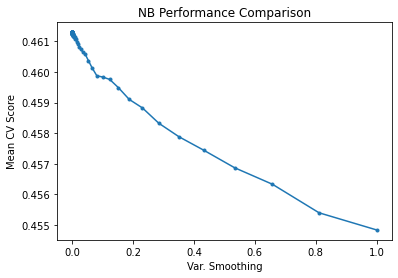

In [16]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [21]:
#Run Naive Bayes w/ tuning hyperparameters
nbm = GaussianNB(var_smoothing=0)
nbm.fit(X_train,y_train)
nbm_predict = nbm.predict(X_test)
nbm_cv_score = cross_val_score(nbm, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, nbm_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, nbm_predict))
print('\n')
print("=== All AUC Scores ===")
print(nbm_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Naive Bayes: ", nbm_predict.mean())

#accuracy
print("acuracy:", metrics.accuracy_score(y_test,nbm_predict))
#precision score
print("precision:", metrics.precision_score(y_test,nbm_predict))
#recall score
print("recall" , metrics.recall_score(y_test,nbm_predict))
print(metrics.classification_report(y_test, nbm_predict))

=== Confusion Matrix ===
[[490 311]
 [498 351]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       801
           1       0.53      0.41      0.46       849

    accuracy                           0.51      1650
   macro avg       0.51      0.51      0.51      1650
weighted avg       0.51      0.51      0.50      1650



=== All AUC Scores ===
[0.52264836 0.50850414 0.54095266 0.48533577 0.51578425 0.47258356
 0.47355958 0.52816845 0.47554361 0.53527256]


=== Mean AUC Score ===
Mean AUC Score - Naive Bayes:  0.4012121212121212
acuracy: 0.5096969696969696
precision: 0.5302114803625377
recall 0.4134275618374558
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       801
           1       0.53      0.41      0.46       849

    accuracy                           0.51      1650
   macro avg       0.51      0.51      0.51      1650
weighted avg       0.51 